<a href="https://colab.research.google.com/github/Manasvi-Shahare/Spam-Detection/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMS Spam Detection**
Archana Kallakuri | Netid- akall011 | Student Id- 862393471

Manasvi Shahare   | Netid- mshah107 | Student Id- 862385260 


### The Question
For a human, determining whether a message is interesting or just spam appears simple. Even while you read the message, your brain may already be aware that it's junk. **How can we build a model that, in some way, mimics the judgments the brain makes when deciding whether a message is spam or something important?**

### The Dataset
We are working on the SMS Spam Collection Data Set present in the UCI Machine Learning Repository. The SMS Spam Collection is a collection of messages with the tag "SMS" that have been gathered for SMS Spam study. It includes one collection of 5,574 English SMS messages that have been classified as either spam or ham (legal). The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

### The Method
Our dataset consists consists of thousands of words and we treat each word as a feature. Since Naive Bayes Algorithm has the ability to handle a large number of features, we use this machine learning algorithm for classification.

## **Basic Setup**
We first import all the python and machine learning libraries required for our project. Numpy library is used for array processing. Pandas is used for data analysis and manipulation. Matplotlib is used for creating interactive visualizations. Scikit-learn is a machine learning library. Collections module provides various types of containers like list, dictionary etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
import requests
from io import BytesIO
from zipfile import ZipFile

##**Importing Data**

We are working on the SMS Spam Collection Data Set present in the UCI Machine Learning Repository. The collection is composed by just one text file, where each line has the correct class followed by the raw message.



In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

z = ZipFile(BytesIO(requests.get(url).content))
z.extractall()
df = pd.read_table('/content/SMSSpamCollection',encoding='latin-1', names=['label', 'sms'])
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **Exploratory Data Analysis**


In [ ]:
#Total number of SMS
print (len(df))

5572


In [ ]:
#Number of ham and spam SMS
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
#show all the characteristics of dataset
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
#Assigning a length field to each message
df['length'] = df['sms'].apply(len)
df.head(5)

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a48baac90>,
      dtype=object)

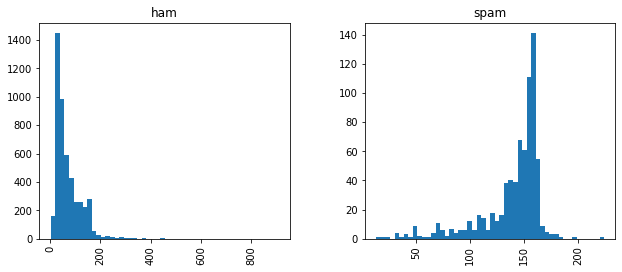

In [ ]:
#Generating histograms for ham and spam messages
df.hist(column='length', by='label', bins=50,figsize=(10,4))

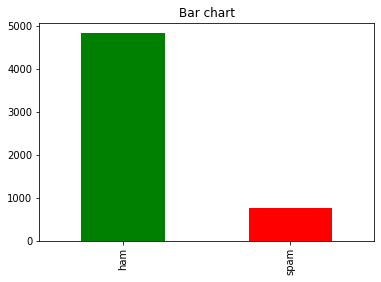

In [ ]:
#Plotting bar graph
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

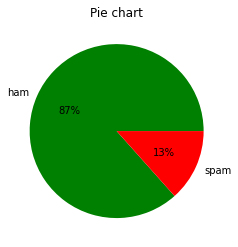

In [ ]:
#plotting pie chart to show the percentage of ham and spam messages
count_Class.plot(kind = 'pie',  autopct='%1.0f%%', colors=["green", "red"])
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
#Count the more frequent words in spam and non-spam messages
count1 = Counter(" ".join(df[df['label']=='ham']["sms"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in ham", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='spam']["sms"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

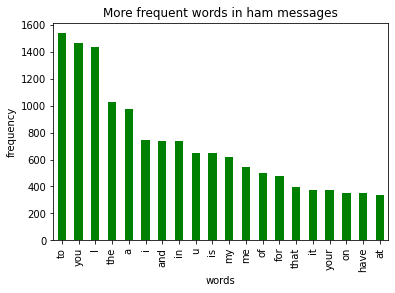

In [ ]:
df1.plot.bar(legend = False, color = 'green')
y_pos = np.arange(len(df1["words in ham"]))
plt.xticks(y_pos, df1["words in ham"])
plt.title('More frequent words in ham messages')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

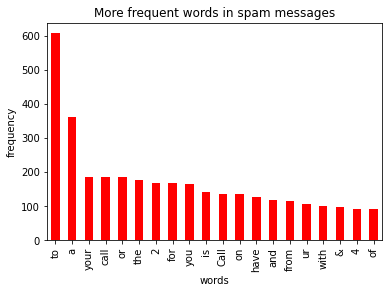

In [ ]:
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

In [ ]:
#Assigning the value 0 to ham messages and 1 to spam messages
df.loc[:,'label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## **Bag of Words Model**

We have a huge collection of text data in our data set. SMS messages are often text-heavy, yet the majority of machine learning algorithms require numerical data as input. For machine learning algorithms, we need a means to represent text data, and the bag-of-words model aids us in accomplishing that goal. It is a technique for removing textual information for inclusion in machine learning systems. Using this method, we determine the frequency of each token by using the tokenized words for each observation.

We will use the Sklearns count vectorizer method to deal with this, which accomplishes the following: 

*  The string is tokenized (divided into its individual words) and each token is assigned an integer ID. 
*  Each occurrence of each of those tokens is counted.

We try to build a frequency matrix on a smaller number of documents to make sure we get how the document-term matrix is generated.


### 1. Converting all words to lowercase

In [ ]:
messages = df.head(5).get('sms')
lower_case_messages = []
for message in messages:
  lower_case_message = ''
  lower_case_message = message.lower()
  lower_case_messages.append(lower_case_message)
print(lower_case_messages)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...', 'ok lar... joking wif u oni...', "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's", 'u dun say so early hor... u c already then say...', "nah i don't think he goes to usf, he lives around here though"]


### 2. Removing punctuation marks

In [ ]:
without_punctuation_messages = []
import string

for i in lower_case_messages:
    without_punctuation_messages.append(i.translate(str.maketrans("","", string.punctuation)))
    
without_punctuation_messages

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though']

### 3. Performing Tokenization
Tokenization is the process of breaking raw text into small chunks which are known as tokens.

In [ ]:
tokenized_messages = [[w for w in d.split()] for d in without_punctuation_messages]
tokenized_messages

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'],
 ['nah',
  'i',
  'dont',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though']]

### 4. Counting frequenies of words
We count how many times each word appears in a message.

In [ ]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in tokenized_messages]
pprint.pprint(frequency_list)

[Counter({'go': 1,
          'until': 1,
          'jurong': 1,
          'point': 1,
          'crazy': 1,
          'available': 1,
          'only': 1,
          'in': 1,
          'bugis': 1,
          'n': 1,
          'great': 1,
          'world': 1,
          'la': 1,
          'e': 1,
          'buffet': 1,
          'cine': 1,
          'there': 1,
          'got': 1,
          'amore': 1,
          'wat': 1}),
 Counter({'ok': 1, 'lar': 1, 'joking': 1, 'wif': 1, 'u': 1, 'oni': 1}),
 Counter({'to': 3,
          'entry': 2,
          'fa': 2,
          'free': 1,
          'in': 1,
          '2': 1,
          'a': 1,
          'wkly': 1,
          'comp': 1,
          'win': 1,
          'cup': 1,
          'final': 1,
          'tkts': 1,
          '21st': 1,
          'may': 1,
          '2005': 1,
          'text': 1,
          '87121': 1,
          'receive': 1,
          'questionstd': 1,
          'txt': 1,
          'ratetcs': 1,
          'apply': 1,
          '08452810

## **Data preprocessing with CountVectorizer()**



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [ ]:
count_vector.fit(messages)
count_vector.get_feature_names()

['08452810075over18',
 '2005',
 '21st',
 '87121',
 'already',
 'amore',
 'apply',
 'around',
 'available',
 'buffet',
 'bugis',
 'cine',
 'comp',
 'crazy',
 'cup',
 'don',
 'dun',
 'early',
 'entry',
 'fa',
 'final',
 'free',
 'go',
 'goes',
 'got',
 'great',
 'he',
 'here',
 'hor',
 'in',
 'joking',
 'jurong',
 'la',
 'lar',
 'lives',
 'may',
 'nah',
 'ok',
 'oni',
 'only',
 'point',
 'question',
 'rate',
 'receive',
 'say',
 'so',
 'std',
 'text',
 'then',
 'there',
 'think',
 'though',
 'tkts',
 'to',
 'txt',
 'until',
 'usf',
 'wat',
 'wif',
 'win',
 'wkly',
 'world']

In [ ]:
doc_array = count_vector.transform(messages).toarray()
doc_array

array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        

In [ ]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,08452810075over18,2005,21st,87121,already,amore,apply,around,available,buffet,...,tkts,to,txt,until,usf,wat,wif,win,wkly,world
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,1,3,1,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


## **Naive Bayes Model**
For our dataset, we are utilizing Sklearn's sklearn.naive bayes technique to produce predictions. We will use the multinomial Naive Bayes implementation in particular. With discrete features like word counts for text classification in our case, this particular classifier is appropriate. It accepts input in the form of integer word counts.

In [ ]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms'], 
                                                    df['label'],test_size=0.20, 
                                                    random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# print(training_data)
# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [ ]:
#Defining a function to visualize the confusion matrix
from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred, plt_title):
    c_m=confusion_matrix(y_test, y_pred)
    print("\u0332".join('\nClassification Report\n'),'\n', classification_report(y_test, y_pred))
    sns.heatmap(c_m, fmt='g', annot=True, cmap='BuGn')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return c_m

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

## **Evaluation**
We are using the Confusion Matrix to obtain the below mentioned evaluation factors:

The classifier's **accuracy** is determined by how frequently it predicts correctly. It is the proportion of correctly predicted events to all predicted events (the number of test data points). 

**Precision** reveals what percentage of the mails we labeled as spam were indeed spam. It is a ratio of true positives (words flagged as spam that are indeed spam) to all positives (words flagged as spam regardless of whether that categorization was accurate). 


**Recall** informs us of the percentage of messages that were truly labeled as spam by our system. The ratio of true positives, or words that were marked as spam but are truly spam, to all the terms that were marked as spam.

The **F1-score** is a statistic that is essentially the harmonic mean of precision and recall. The formula of the F1 score depends completely upon precision and recall.

Accuracy Score for Naive Bayes Classification:  0.9910313901345291

̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲
 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.99      0.95      0.97       147

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



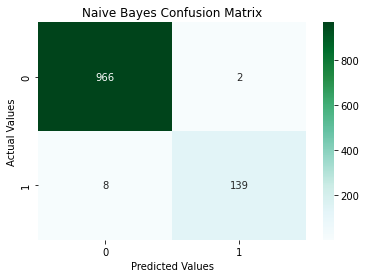

In [ ]:
predictions = naive_bayes.predict(testing_data)
print('Accuracy Score for Naive Bayes Classification: ',accuracy_score(y_test,predictions))
cm_NB= plot_confusion_matrix(y_test, predictions, 'Naive Bayes Confusion Matrix')


##**Conclusion**
The capability of Naive Bayes to handle an exceptionally large number of features is one of its key benefits over other classification methods. Since there are thousands of different words, they are all treated as features in our situation. Additionally, it functions well even when irrelevant features are present and is largely unaffected by them. 

Its relative simplicity is another key benefit. Naive Bayes' works well out of the box and rarely needs its parameters adjusted, unless typically in situations when the data distribution is known. Rarely does the data overfit the model. 

Another key benefit is how quickly the model trains and predicts given the volume of data it can manage.